### **Import Dependencies**

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
plt.style.use(style='ggplot')

### **Import Data**


In [130]:
data = pd.read_csv('train.csv')
data.head() # Display the First five rows

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


### **Data Exploration(EDA)**

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [132]:
data.drop('id', axis=1).describe()# Descriptive Stats

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


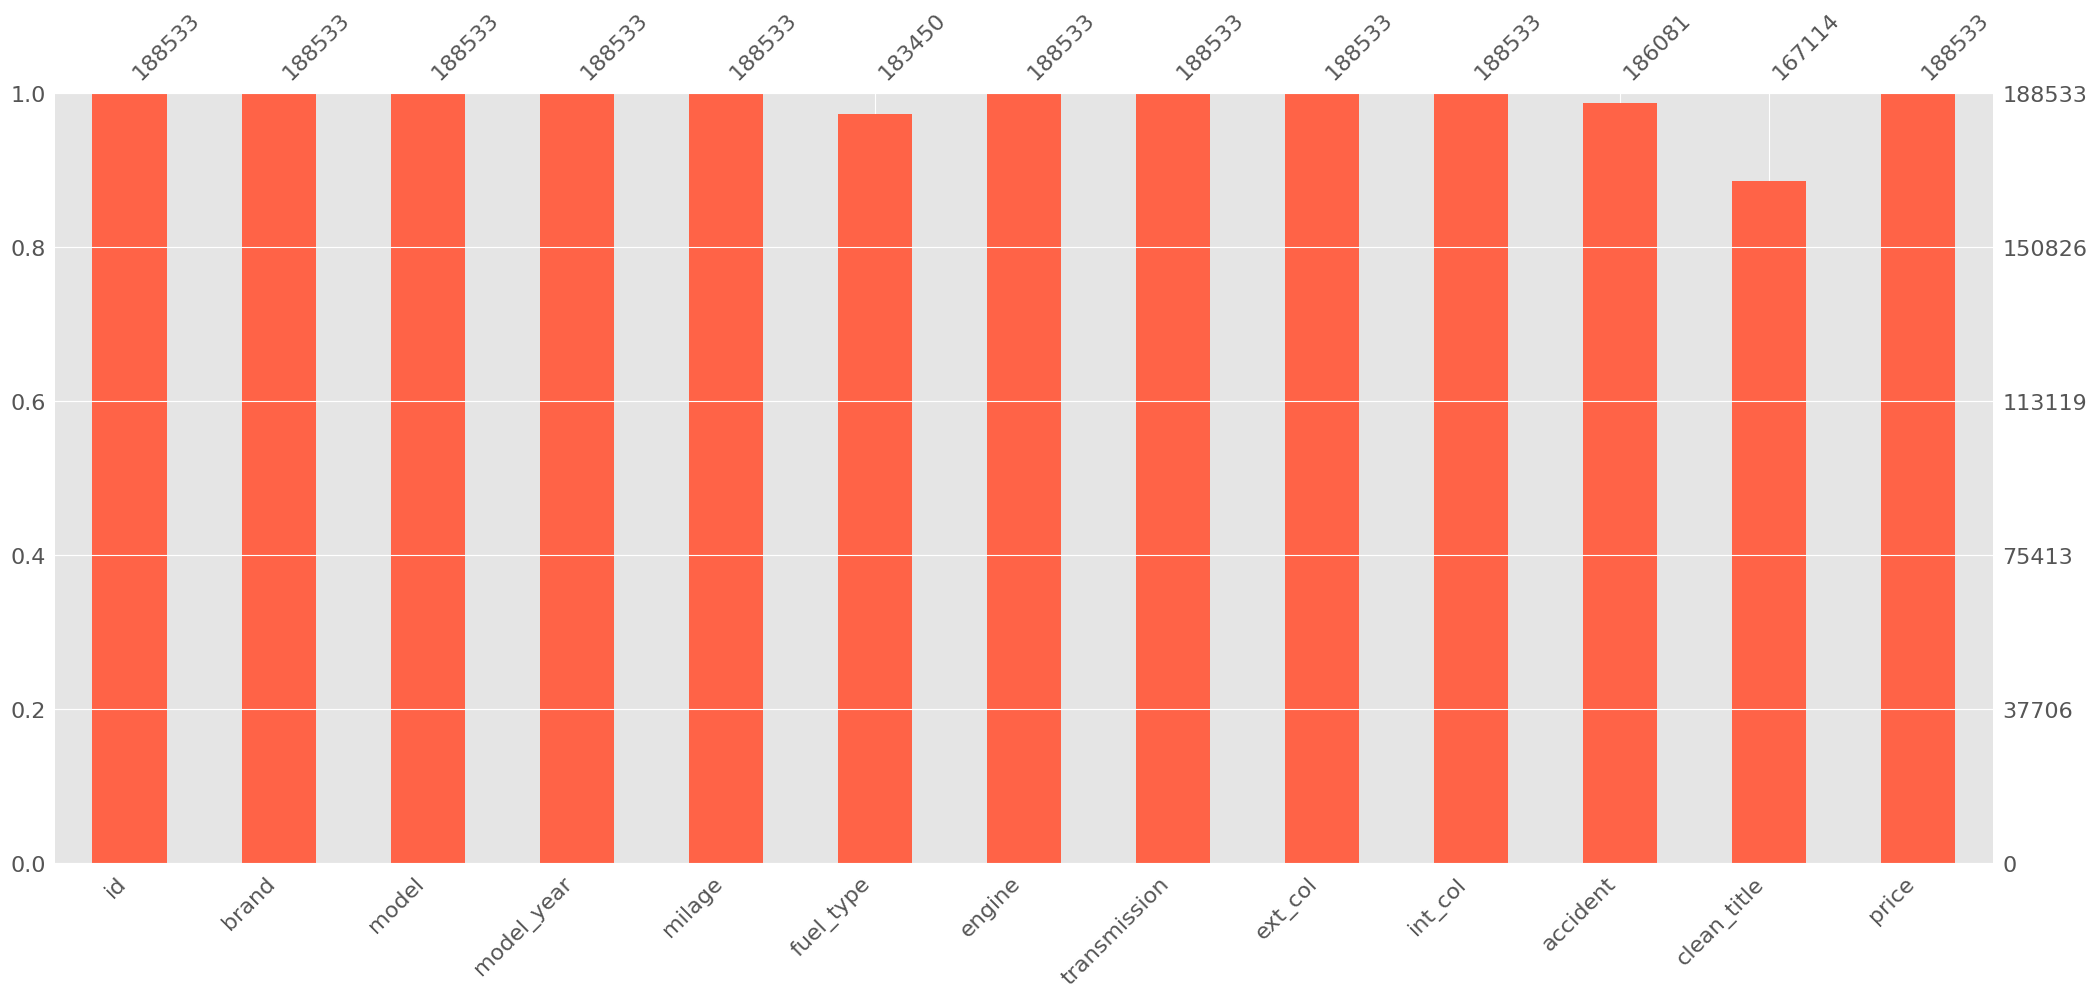

In [133]:
# Check for missing values through Visualization
msno.bar(data, color='tomato');

In [134]:
# Missing values count
data.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [135]:
# Missing Value Percentage
(data.isna().sum()/len(data) * 100).round(2)

id               0.00
brand            0.00
model            0.00
model_year       0.00
milage           0.00
fuel_type        2.70
engine           0.00
transmission     0.00
ext_col          0.00
int_col          0.00
accident         1.30
clean_title     11.36
price            0.00
dtype: float64

In [136]:
# Check for Duplicates
data.duplicated().sum()

np.int64(0)

> Numerical Features

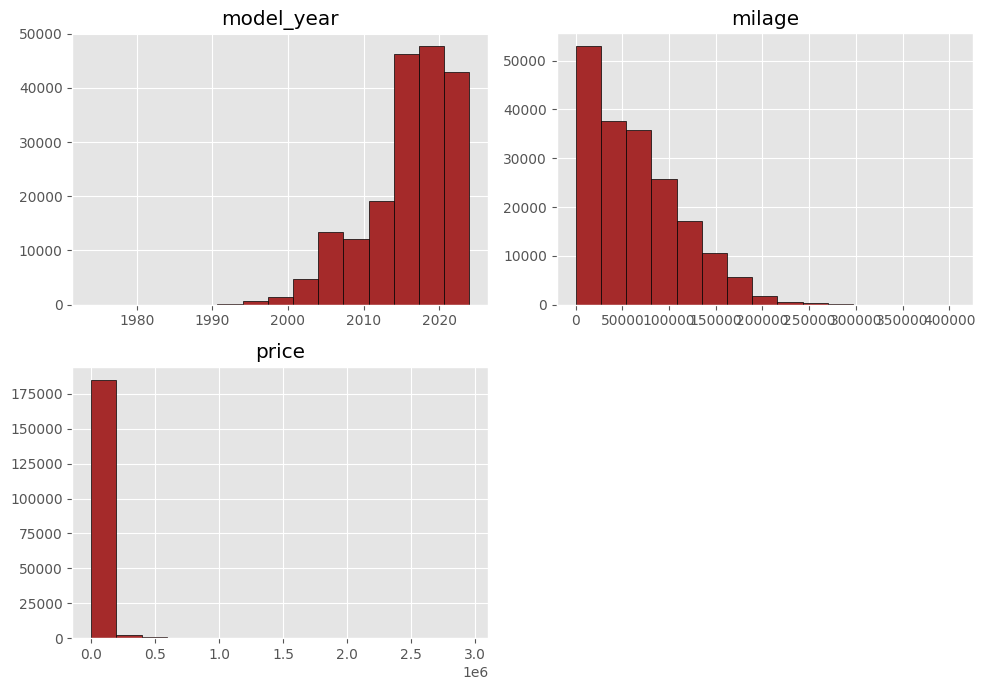

In [137]:
# Data Distribution
data.drop(columns='id', axis=1).hist(figsize=(10,7),
                                    bins=15,
                                    color= 'brown',
                                    edgecolor= 'black',
                                    );
plt.tight_layout()

In [138]:
data.select_dtypes('number').drop(columns='id', axis=1).skew()

model_year    -1.044511
milage         0.895062
price         20.268453
dtype: float64

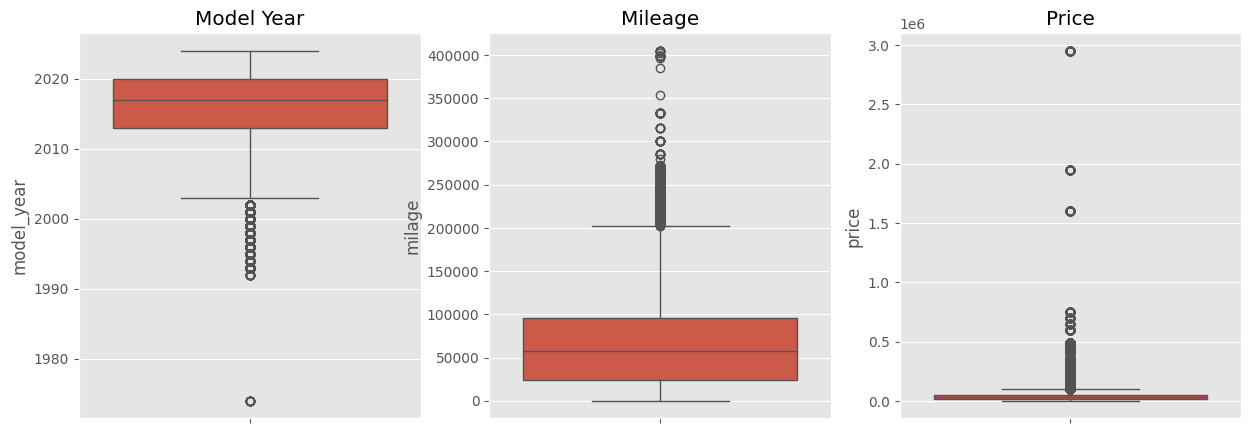

In [139]:
# Chexk for Outliers
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data['model_year'])
plt.title('Model Year')

plt.subplot(1,3,2)
sns.boxplot(data['milage'])
plt.title('Mileage')

plt.subplot(1,3,3)
sns.boxplot(data['price'])
plt.title('Price')

plt.show()

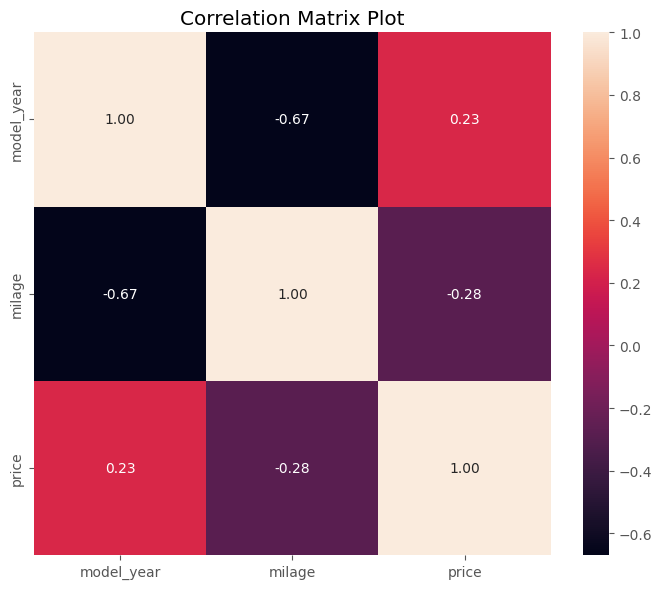

In [140]:
# Check for Multi-colinearity
corr = data.select_dtypes('number').drop('id', axis=1).corr()

#Visualize
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Matrix Plot')
plt.tight_layout()
plt.show()

> Categorical Features

In [141]:
data.describe(include='O') # Descriptive Stats

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,188533,188533,183450,188533,188533,188533,188533,186081,167114
unique,57,1897,7,1117,52,319,156,2,1
top,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,23088,2945,165940,3462,49904,48658,107674,144514,167114


In [142]:
cat_cols = data.select_dtypes('O').columns
cat_cols

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

In [143]:
data['clean_title'].nunique()

1

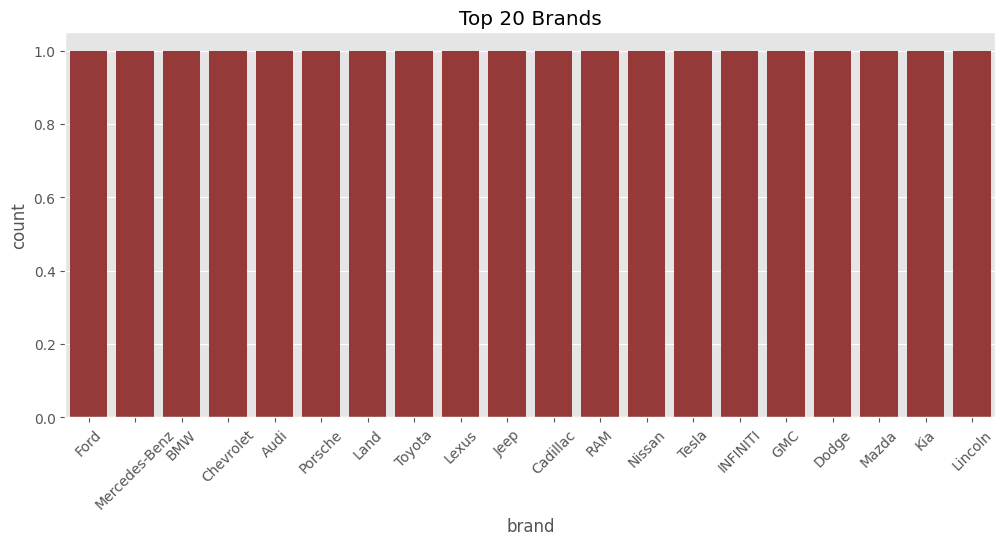

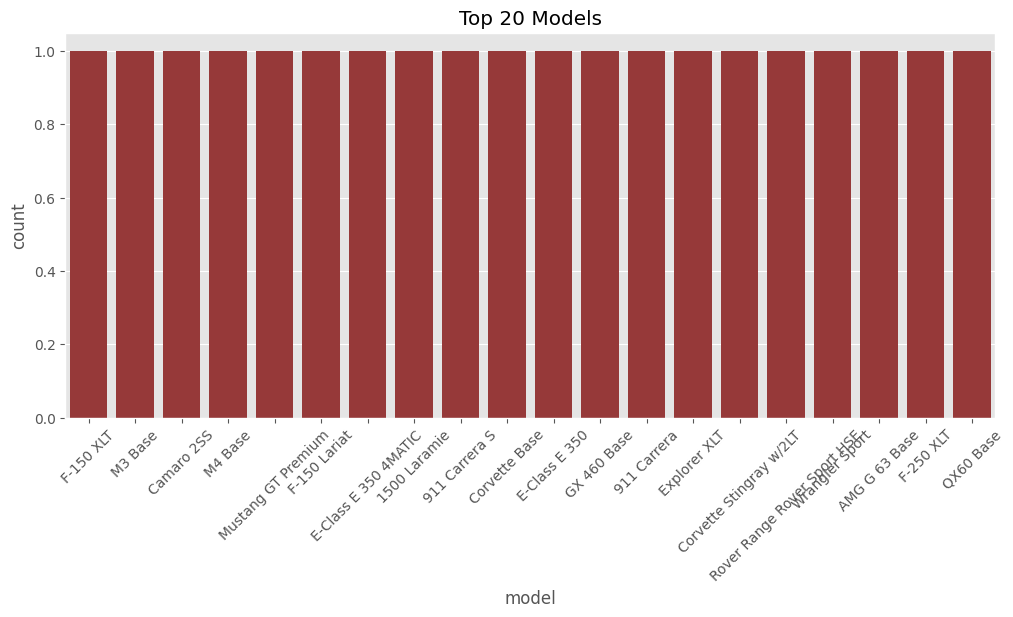

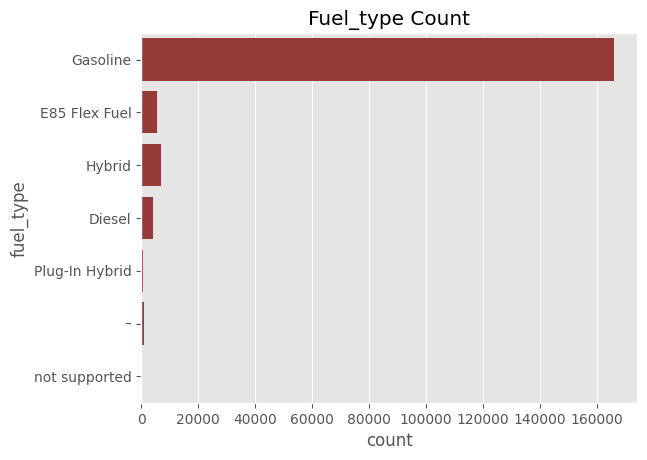

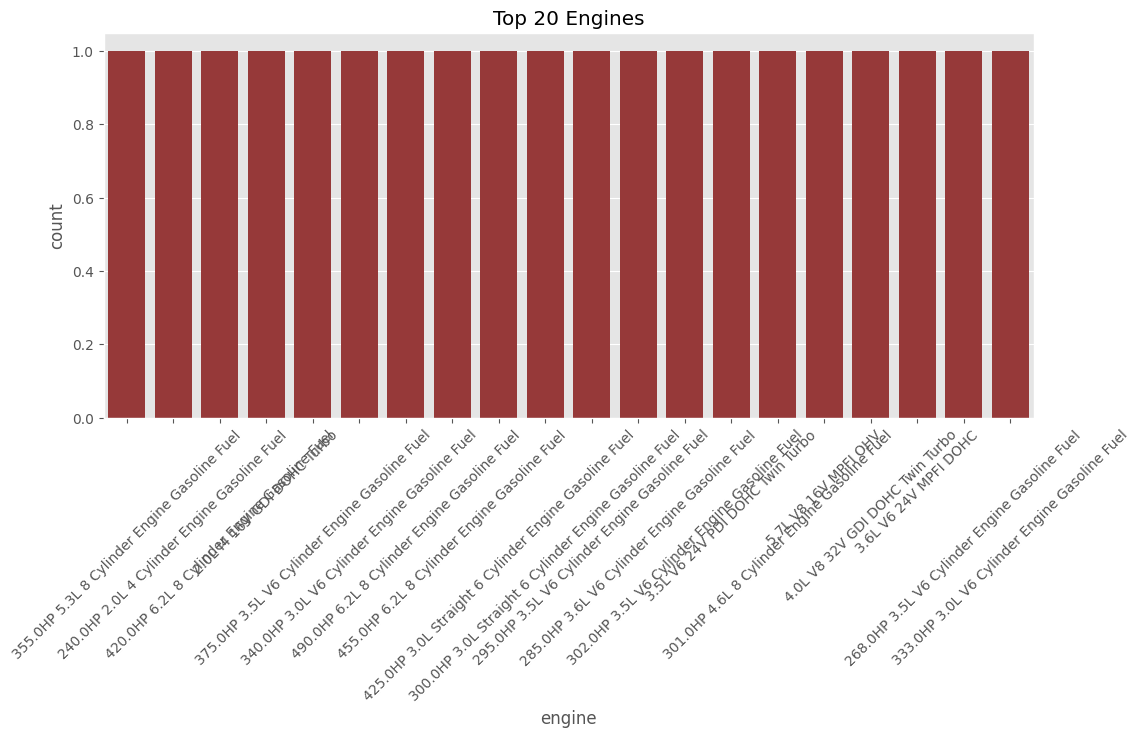

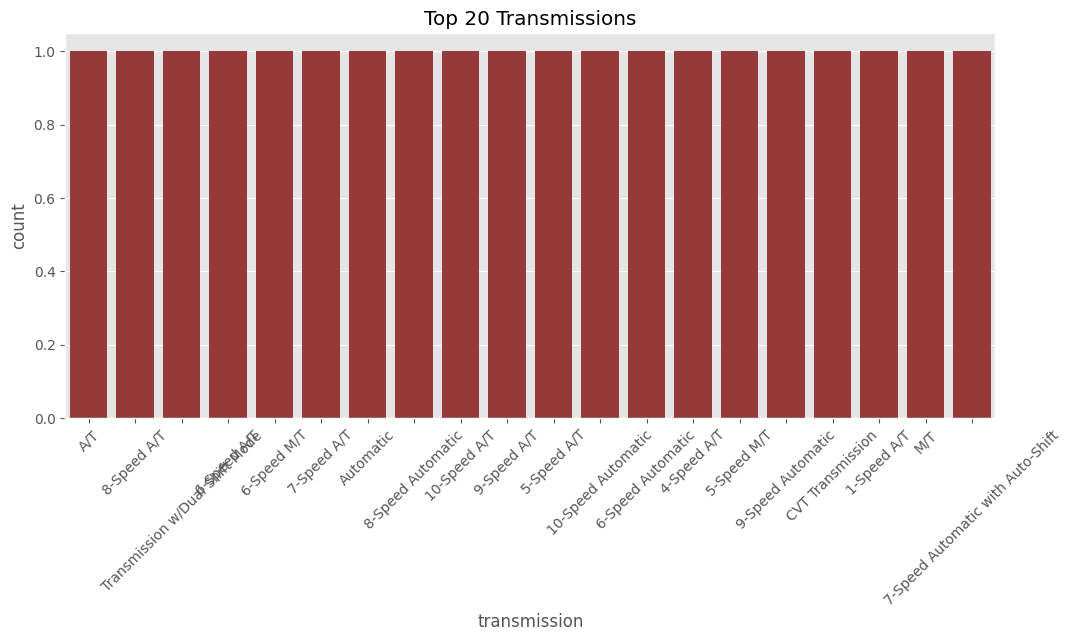

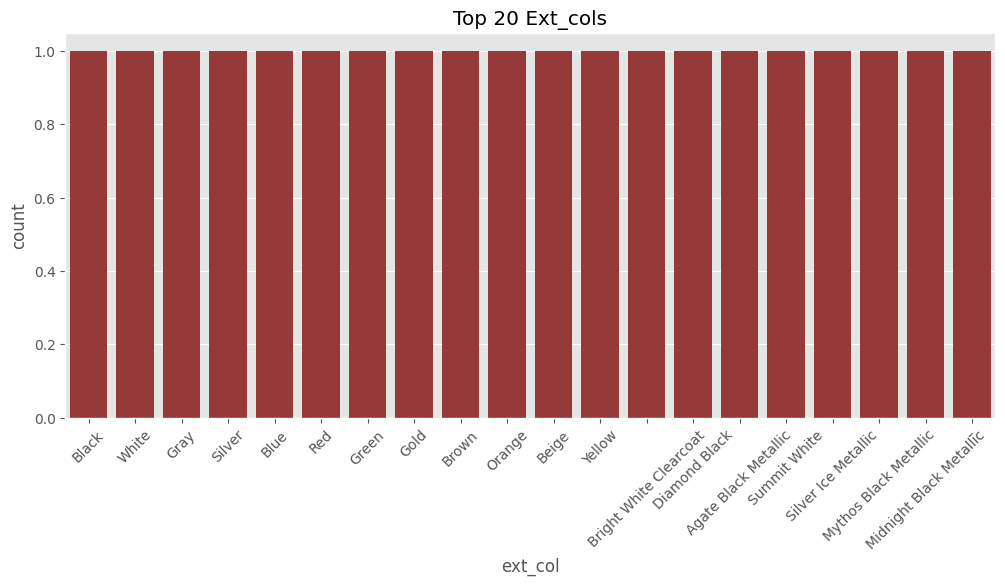

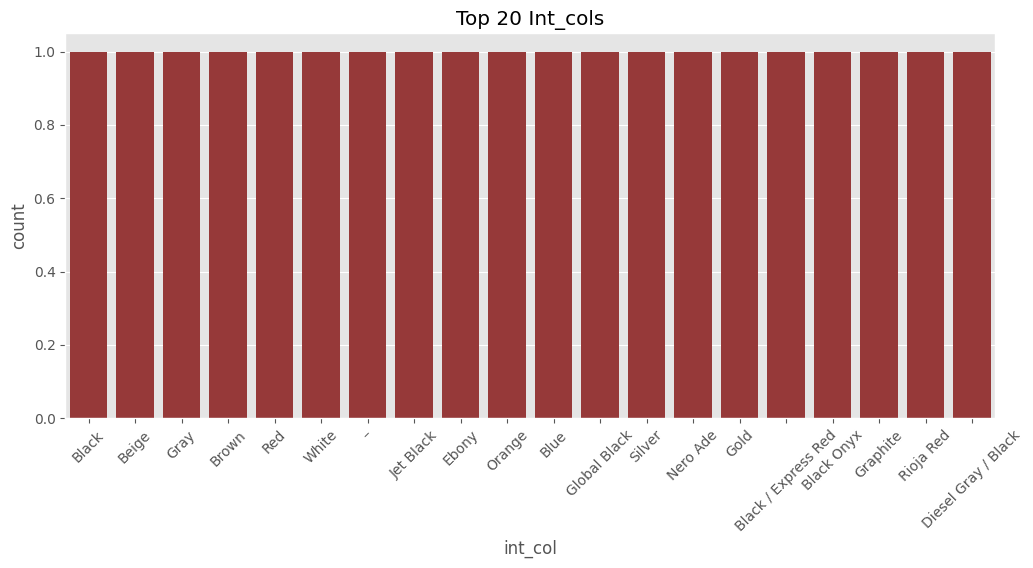

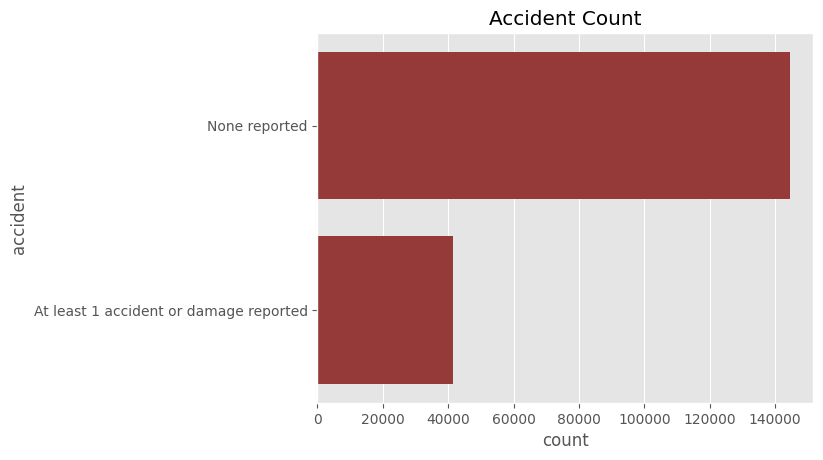

In [144]:
for col in cat_cols:
    if data[col].nunique() > 10:
        count = data[col].value_counts().head(20)
        
        plt.figure(figsize=(12,5))
        sns.countplot(count, color='brown')
        plt.title(f'Top 20 {col.capitalize()}s')
        plt.xticks(rotation= 45)
        plt.show()
    elif data[col].nunique() != 1:
        sns.countplot(data[col], color='brown')
        plt.title(f'{col.capitalize()} Count')
        plt.show()

### **Data Cleaning & Transformation**

In [145]:
# Make a copy of the original Data
cleaned_data = data.copy()

# Drop 'id' column
cleaned_data.drop(columns='id', inplace=True)

> **Missing Values**

In [146]:
cleaned_data[cleaned_data['brand'] == 'Tesla'].head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
32,Tesla,Model S P100D,2018,30300,NaN,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
52,Tesla,Model X 75D,2021,88000,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,Black,None reported,Yes,53600
161,Tesla,Model S Long Range,2021,9500,NaN,670.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,89999
194,Tesla,Model 3 Standard Range Plus,2021,42094,Gasoline,Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,32750
211,Tesla,Model Y Long Range,2020,60000,Gasoline,425.0HP Electric Motor Electric Fuel System,A/T,White,White,At least 1 accident or damage reported,Yes,60000
240,Tesla,Model Y Performance,2020,46897,NaN,455.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,29000
283,Tesla,Model Y Performance,2023,7578,NaN,Electric,Automatic,White,Black,None reported,NaN,267950
379,Tesla,Model X 75D,2023,5338,NaN,518.0HP Electric Motor Electric Fuel System,A/T,Gray,White,None reported,Yes,97500


In [147]:
# Replacing every 'Tesla' fuel type to 'ELectric' as it should be
cleaned_data.loc[cleaned_data['brand'] == 'Tesla', 'fuel_type'] = 'Electric'

cleaned_data[cleaned_data['brand'] == 'Tesla'].head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
11,Tesla,Model S P100D,2015,81500,Electric,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
32,Tesla,Model S P100D,2018,30300,Electric,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
51,Tesla,Model 3 Long Range,2020,38360,Electric,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
52,Tesla,Model X 75D,2021,88000,Electric,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,Black,None reported,Yes,53600
161,Tesla,Model S Long Range,2021,9500,Electric,670.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,89999
194,Tesla,Model 3 Standard Range Plus,2021,42094,Electric,Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,32750
211,Tesla,Model Y Long Range,2020,60000,Electric,425.0HP Electric Motor Electric Fuel System,A/T,White,White,At least 1 accident or damage reported,Yes,60000
240,Tesla,Model Y Performance,2020,46897,Electric,455.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,29000
283,Tesla,Model Y Performance,2023,7578,Electric,Electric,Automatic,White,Black,None reported,NaN,267950
379,Tesla,Model X 75D,2023,5338,Electric,518.0HP Electric Motor Electric Fuel System,A/T,Gray,White,None reported,Yes,97500


In [148]:
# Recheck Missing values counts
cleaned_data.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        1722
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [149]:
# FIlling the rest of the fuel type with the mode
cleaned_data['fuel_type'] = cleaned_data['fuel_type'].fillna(cleaned_data['fuel_type'].mode()[0])

cleaned_data.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [150]:
cleaned_data[cleaned_data['clean_title'].isna()].head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
20,Land,Rover Defender S,2023,7978,Gasoline,5.2L V10 40V PDI DOHC,8-Speed Automatic,Santorini Black Metallic,Black,None reported,NaN,41998
45,RAM,1500 Laramie,2022,27352,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Black,None reported,NaN,42599
51,Tesla,Model 3 Long Range,2020,38360,Electric,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
60,Mercedes-Benz,GLS 450 Base 4MATIC,2017,44147,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,9-Speed Automatic,White,Parchment.,At least 1 accident or damage reported,NaN,29999
70,McLaren,570S Spider,2023,3254,Gasoline,3.8L V8 32V MPFI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,Vega Blue,Black,None reported,NaN,92500


In [151]:
cleaned_data[(cleaned_data['accident'] == 'At least 1 accident or damage reported')
             & (cleaned_data['clean_title'] == 'Yes')].head() # Accident Reported but has a clean title is Impossible

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
10,Chevrolet,Camaro 1LT,2011,212500,Gasoline,312.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Gray,At least 1 accident or damage reported,Yes,7950
13,Audi,S4 3.0T Premium Plus,2013,60000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,12300
18,Toyota,Tundra SR5,2011,153250,Gasoline,310.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Gray,Gray,At least 1 accident or damage reported,Yes,9999
19,Mercedes-Benz,AMG C 63 Base,2019,16002,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,9-Speed A/T,White,Red,At least 1 accident or damage reported,Yes,46900


In [152]:
# Replacing and filling the clean_title and accident column based on some condition
cleaned_data.loc[cleaned_data['accident'] == 'At least 1 accident or damage reported', 'clean_title']= 'No'

# Recheck
cleaned_data[(cleaned_data['accident'] == 'At least 1 accident or damage reported')
             & (cleaned_data['clean_title'] == 'Yes')].head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [153]:
cleaned_data.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     20265
price               0
dtype: int64

In [154]:
# Checking to see if there are rows that has missing value in both 'accident' and 'clean_title'
doublenans = cleaned_data[(cleaned_data['accident'].isna())
             & (cleaned_data['clean_title'].isna())]
print(doublenans.shape)
doublenans.head()

(2438, 12)


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
87,RAM,2500 Big Horn,2012,95400,Diesel,350.0HP 6.7L Straight 6 Cylinder Engine Diesel...,6-Speed A/T,Black,Black,NaN,NaN,27899
134,Jeep,Gladiator Sport,2021,61341,Gasoline,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Firecracker Red Clearcoat,Black,NaN,NaN,32455
164,Acura,RDX w/A-Spec Package,2023,39517,Gasoline,2.0 Liter DOHC Turbo,Automatic,Gray,Black,NaN,NaN,29645
333,Mercedes-Benz,SLK-Class SLK320,2001,170000,Gasoline,215.0HP 3.2L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Black,Beige,NaN,NaN,6000
361,RAM,2500 SLT,2016,69600,Gasoline,410.0HP 6.4L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Gray,NaN,NaN,35900


In [155]:
cleaned_data['accident'] = cleaned_data['milage'].apply(
    lambda x: 'At least 1 accident or damage reported' if x < np.mean(cleaned_data['milage']) else 'None reported'
)


In [156]:
dnan = cleaned_data[(cleaned_data['accident'].isna())
             & (cleaned_data['clean_title'].isna())]

In [157]:
cleaned_data.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title     20265
price               0
dtype: int64

In [158]:
cleaned_data[cleaned_data['clean_title'].isna()].head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
20,Land,Rover Defender S,2023,7978,Gasoline,5.2L V10 40V PDI DOHC,8-Speed Automatic,Santorini Black Metallic,Black,At least 1 accident or damage reported,NaN,41998
45,RAM,1500 Laramie,2022,27352,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Black,At least 1 accident or damage reported,NaN,42599
51,Tesla,Model 3 Long Range,2020,38360,Electric,Dual Motor - Standard,Automatic,White,Black,At least 1 accident or damage reported,NaN,59598
70,McLaren,570S Spider,2023,3254,Gasoline,3.8L V8 32V MPFI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,Vega Blue,Black,At least 1 accident or damage reported,NaN,92500
72,Toyota,Sequoia Platinum,2023,2958,Hybrid,3.4L V6 24V PDI DOHC Twin Turbo Hybrid,Automatic,Green,Boulder,At least 1 accident or damage reported,NaN,65998


In [159]:
cleaned_data['clean_title'] = cleaned_data['accident'].apply(
    lambda x: 'Yes' if x == 'None reported' else 'No'
)
cleaned_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,None reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,At least 1 accident or damage reported,No,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,At least 1 accident or damage reported,No,97500


In [160]:
cleaned_data.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

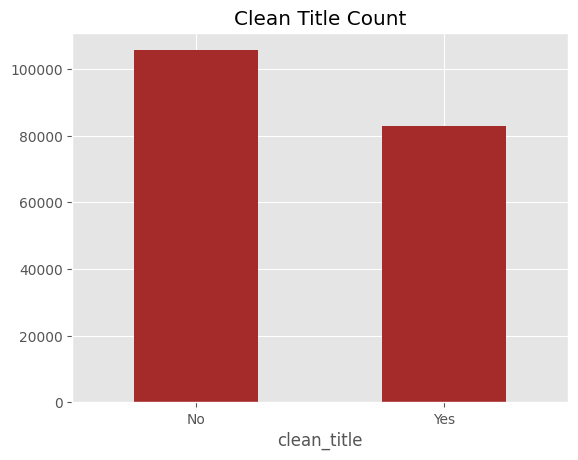

In [161]:
cleaned_data['clean_title'].value_counts().plot(
    kind='bar',
    color= 'brown'
)
plt.title('Clean Title Count')
plt.xticks(rotation = 0);

In [162]:
cleaned_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,None reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,At least 1 accident or damage reported,No,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,At least 1 accident or damage reported,No,97500


> Handling Outliers

In [163]:
# Get the columns
outlier_cols = cleaned_data.select_dtypes('number').columns
outlier_cols

Index(['model_year', 'milage', 'price'], dtype='object')

In [164]:
def whiskers(df, col):
    # Get the Percentiles
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1 

    # Define whiskers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

In [165]:
for col in outlier_cols:
    
    lower, upper = whiskers(cleaned_data, col)

    cleaned_data[col] = cleaned_data[col].clip(lower, upper)

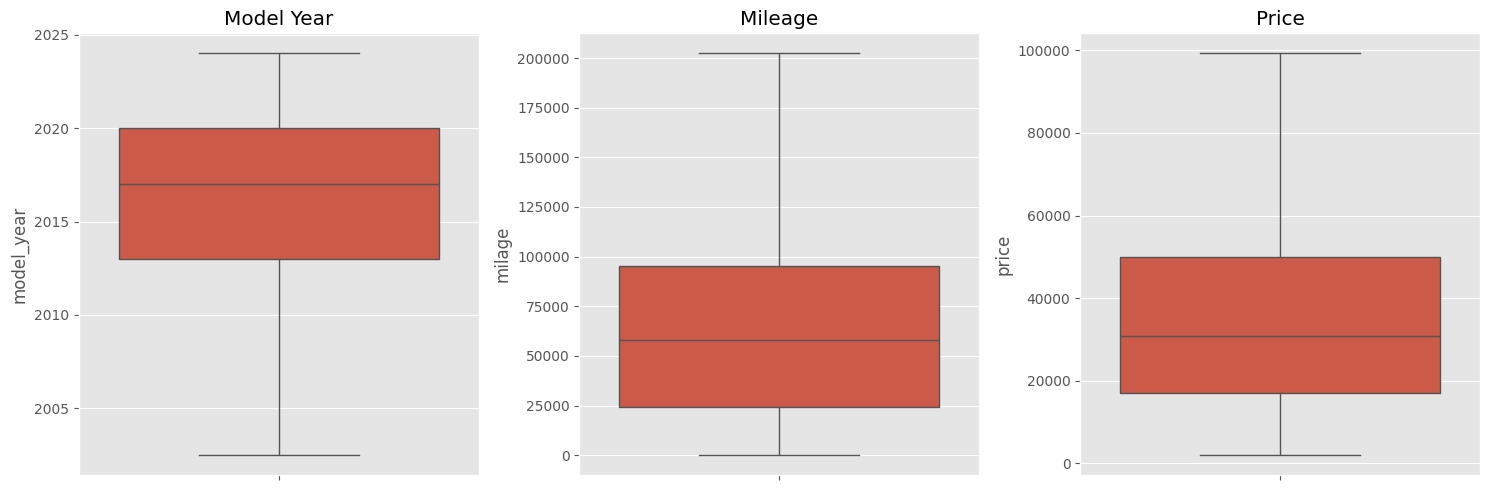

In [166]:
# Recheck for Outliers with the cleaned data
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(cleaned_data['model_year'])
plt.title('Model Year')

plt.subplot(1,3,2)
sns.boxplot(cleaned_data['milage'])
plt.title('Mileage')

plt.subplot(1,3,3)
sns.boxplot(cleaned_data['price'])
plt.title('Price')

plt.tight_layout()
plt.show()

In [167]:
cleaned_data[outlier_cols].skew()

model_year   -0.846929
milage        0.738586
price         0.978607
dtype: float64

> Handling Skewness(log transformation)

In [168]:
cleaned_data['price_log'] = np.log1p(cleaned_data['price'])
cleaned_data['milage_log'] = np.log1p(cleaned_data['milage'])
cleaned_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,price_log,milage_log
0,MINI,Cooper S Base,2007.0,202327.5,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,8.343078,12.217648
1,Lincoln,LS V8,2002.5,143250.0,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,None reported,Yes,4999,8.517193,11.872354
2,Chevrolet,Silverado 2500 LT,2002.5,136731.0,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,9.539716,11.825778
3,Genesis,G90 5.0 Ultimate,2017.0,19500.0,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,At least 1 accident or damage reported,No,45000,10.714440,9.878221
4,Mercedes-Benz,Metris Base,2021.0,7388.0,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,At least 1 accident or damage reported,No,97500,11.487618,8.907748


In [169]:
cleaned_data[['price_log', 'milage_log']].skew()


price_log    -0.426388
milage_log   -1.362963
dtype: float64

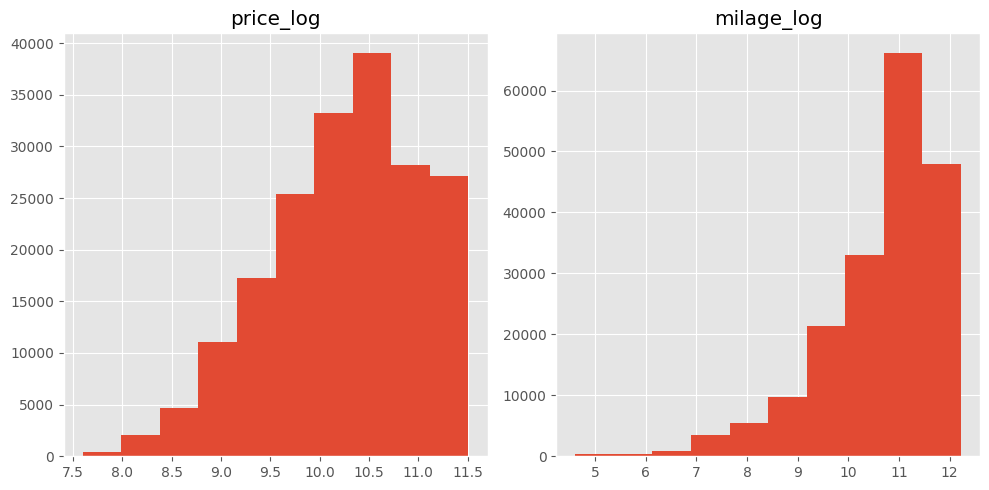

In [170]:
cleaned_data[['price_log', 'milage_log']].hist(figsize=(10,5))
plt.tight_layout()

In [171]:
cleaned_data.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'price_log', 'milage_log'],
      dtype='object')

### Splitting Data into Input and Target Features

In [172]:
X = cleaned_data[['brand', 'model_year', 'milage_log', 'fuel_type', 'accident', 'clean_title']]
y = cleaned_data.price_log

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [174]:
preprocess = ColumnTransformer(
    transformers= [
        ('Categorical', OneHotEncoder(drop='first', sparse_output=False), X.select_dtypes('O').columns),
        ('Numerical', StandardScaler(), X.select_dtypes('number').columns)
    ], remainder='drop'
)

In [175]:
model = Pipeline(
    steps= [
        ('Preprocess', preprocess),
        ('model', LinearRegression())
    ]
)

In [176]:
model.fit(X_train, y_train)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(transformers=[('Categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['brand', 'fuel_type', 'accident', 'clean_title'], dtype='object')),
                                                 ('Numerical', StandardScaler(),
                                                  Index(['model_year', 'milage_log'], dtype='object'))])),
                ('model', LinearRegression())])

In [177]:
ypred = model.predict(X_test)
ypred

array([10.75400985,  9.55898548,  9.94596516, ...,  9.72113283,
        9.95309542,  9.53121034], shape=(56560,))

In [178]:
inverted_prediction = np.expm1(ypred)
inverted_prediction

array([46816.38344909, 14170.46172997, 20866.85392865, ...,
       16665.11391124, 21016.17878998, 13782.26345721], shape=(56560,))

In [179]:
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print(f'Model MSE: {mse:.3f}')
print(f'Model R2 score: {r2:.3f}')

Model MSE: 0.225
Model R2 score: 0.622


In [ ]:
def prediction_log_inverse(prediction):
    df = pd.DataFrame(prediction, columns= X.columns) # covert to dataframe
    pred = model.predict(df)# Make prediction
    pred_inverse = np.expm1(pred).round(2) # Inverse Prediction
    
    return pred_inverse

In [191]:
my_pred = [['Ford', 2025, np.log1p(100000), 'Gasoline', 'None reported', 'Yes']]
prediction_log_inverse(my_pred)

array([37782.78])

In [192]:
# Bias Checking
# Train Set
train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, train_pred)

# Test Set
test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, test_pred)

print(f"Train R2: {train_r2:.3f}")
print(f"Test R2: {test_r2:.3f}")
print(f"R2 Difference: {train_r2 - test_r2:.3f}")

if train_r2 - test_r2 > 0.5:
    print("Warning: Model may be overfitting (high bias detected).")
else:
    print("No strong bias detected.")

Train R2: 0.629
Test R2: 0.622
R2 Difference: 0.007
No strong bias detected.
